In [200]:
%pwd

'C:\\Users\\Harshil Kotamreddy'

In [201]:
%ls Downloads

 Volume in drive C is OS
 Volume Serial Number is F202-4249

 Directory of C:\Users\Harshil Kotamreddy\Downloads

05/22/2019  09:03 AM    <DIR>          .
05/22/2019  09:03 AM    <DIR>          ..
05/16/2019  11:31 AM           251,714 Final.pdf
05/21/2019  02:05 PM             1,551 H_and_L_and_R_squared.csv
05/20/2019  02:45 PM             2,599 ion.csv
05/20/2019  02:51 PM             2,599 ion.csv.txt
05/20/2019  02:36 PM         1,966,842 jz7b02203_si_002.xlsx
05/21/2019  02:04 PM            31,720 output.csv
05/16/2019  01:01 PM           135,329 Rubric for Fifth Risk Assignment2019.docx
05/20/2019  02:45 PM             1,319 zungervalenceradius.csv
05/20/2019  02:53 PM             1,319 zungervalenceradius.csv.txt
               9 File(s)      2,394,992 bytes
               2 Dir(s)  787,305,857,024 bytes free


In [202]:
import pickle
import numpy as np
import pandas as pd
from pymatgen.core.periodic_table import Element

In [203]:
df = pd.read_excel('Downloads\jz7b02203_si_002.xlsx')

https://pastebin.com/2kjARVGa
https://pastebin.com/kF9sHtX0

**Compounds** <br/>
In the form: $A_{2}BB^{'}X_{6}$ <br/>
Attributes of each ion in the dataset

In [204]:
df.columns

Index(['System', 'TotEne_PBE_Smear', 'TotEne_PBE_Nonsmear', 'TotEne_SOPBE',
       'TotEne_SOHSE_Approx1', 'TotEne_SOHSE_Approx2', 'TotEne_SOHSE_Approx',
       'DirectGap_PBE', 'DirectGap_SOPBE', 'DirectGap_SOHSE_Approx1',
       'DirectGap_SOHSE_Approx2', 'DirectGap_SOHSE_Approx', 'IndirectGap_PBE',
       'IndirectGap_SOPBE', 'IndirectGap_SOHSE_Approx1',
       'IndirectGap_SOHSE_Approx2', 'IndirectGap_SOHSE_Approx', 'LowGap_PBE',
       'LowGap_SOPBE', 'LowGap_SOHSE_Approx1', 'LowGap_SOHSE_Approx2',
       'LowGap_SOHSE_Approx', 'LowGapType_PBE', 'LowGapType_SOPBE',
       'LowGapType_SOHSE_Approx1', 'LowGapType_SOHSE_Approx2',
       'LowGapType_SOHSE_Approx', 'Ev_SOHSE_Approx1', 'Ev_SOHSE_Approx2',
       'Ev_SOHSE_Approx', 'Ec_SOHSE_Approx1', 'Ec_SOHSE_Approx2',
       'Ec_SOHSE_Approx', 'Mass_VBM', 'Mass_CBM', 'perovskite', 'nontoxicity'],
      dtype='object')

In [205]:
df = df[['System', 'LowGap_SOHSE_Approx']]

In [206]:
df = df.dropna()

In [207]:
df = df[df['LowGap_SOHSE_Approx'] >= 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019657189F28>]],
      dtype=object)

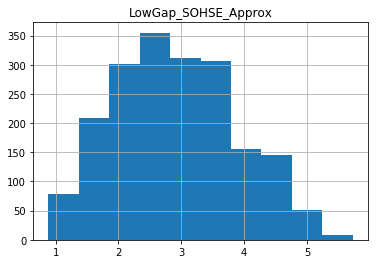

In [208]:
%matplotlib inline
df.hist()

In [209]:
# Three kinds
# (1) C4N4H24 '(CH3NH3)4' 'MA4'
# (2) C4N8H20 '(CH(NH2)2)4' 'FA4'
# (3) Cs4     'Cs4'
df.head(30)

,System,LowGap_SOHSE_Approx
1,C4N4H24B4I12,3.179699
2,C4N4H24C4I12,1.842794
3,C4N4H24N4I12,2.322279
4,C4N4H24Mg4I12,2.900182
5,C4N4H24Al4I12,2.038116
6,C4N4H24Si4I12,1.442668
18,C4N4H24Zn4I12,4.158610
19,C4N4H24Ga4I12,1.598870
20,C4N4H24Ge4I12,1.830432
32,C4N4H24Cd4I12,1.962283


In [210]:
a_sites = df['System'].str.extract(r'(C4N4H24|C4N8H20|Cs4)')
a_sites.replace('C4N4H24', 'MA', inplace = True)
a_sites.replace('C4N8H20', 'FA', inplace = True)
a_sites.replace('Cs4', 'Cs', inplace = True)


In [211]:
df['A_sites'] = a_sites

In [212]:
# data dict = {'H' : ...,
#             'He' : ...}
IONIC_R_DICT = {Element.from_Z(i).symbol : Element.from_Z(i).average_ionic_radius
                for i in range(1,93)}

#Kieslich et al. Chem. Sci., 2014, 5, 4712
IONIC_R_DICT['MA'] = 2.17
IONIC_R_DICT['FA'] = 2.53

In [213]:
ionic_radius_a = a_sites.replace(IONIC_R_DICT)

In [214]:
#contains
#separate all the rows that contain compounds with B-sides of the form B2B'2
true_dbls = df[df['System'].str.contains(r'[a-zA-Z]+(?=2[a-zA-Z]+2)')]
#match a group of alphabetical chars followed by a 2, another group of alphabetical chars, and then another 2
b_sites = true_dbls['System'].str.extract(r'([a-zA-Z]+)(?=2[a-zA-z]+2)')
#match a group of alphabetical chars followed by a 2, another group of alphabetical chars, and then a 12
b_prime_sites = true_dbls['System'].str.extract(r'([a-zA-Z]+)(?=2[a-zA-z]+12)')

In [215]:
true_dbls['B_sites'] = b_sites.copy()
true_dbls['B_prime_sites'] = b_prime_sites.copy()

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [216]:
false_dbls = df[~df['System'].str.contains(r'[a-zA-Z]+(?=2[a-zA-Z]+2)')]
b_sites = false_dbls['System'].str.extract(r'([a-zA-Z])+(?=4[a-zA-Z]+12)')

false_dbls['B_sites'] = b_sites.copy()
false_dbls['B_prime_sites'] = b_sites.copy()

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [217]:
df = pd.concat([true_dbls, false_dbls])

In [220]:
x_sites = df['System'].str.extract(r'([a-zA-Z]+)(?=12)')
x_sites

,0
50,I
52,I
54,I
60,I
61,I
63,I
65,I
66,I
67,I
75,I
